In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_all = pd.read_csv('consensus.csv', parse_dates=True)

## Data wrangling
### To extract data for NVDA only.

In [3]:
df = df_all[df_all['ticker'] == 'NVDA']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7137 entries, 2386759 to 2393895
Data columns (total 22 columns):
date                         7137 non-null object
ticker                       7137 non-null object
cusip                        7137 non-null object
fiscal_year                  7137 non-null int64
fiscal_quarter               7137 non-null int64
reports_at                   7137 non-null object
estimize.eps.weighted        7131 non-null float64
estimize.eps.mean            7137 non-null float64
estimize.eps.high            7137 non-null float64
estimize.eps.low             7137 non-null float64
estimize.eps.sd              7137 non-null float64
estimize.eps.count           7137 non-null float64
estimize.revenue.weighted    6486 non-null float64
estimize.revenue.mean        6396 non-null float64
estimize.revenue.high        6396 non-null float64
estimize.revenue.low         6396 non-null float64
estimize.revenue.sd          6396 non-null float64
estimize.revenue.count   

In [5]:
df[df['estimize.eps.mean'].isnull()]

,date,ticker,cusip,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.mean,estimize.eps.high,estimize.eps.low,...,estimize.revenue.weighted,estimize.revenue.mean,estimize.revenue.high,estimize.revenue.low,estimize.revenue.sd,estimize.revenue.count,wallstreet.eps,wallstreet.revenue,actual.eps,actual.revenue


In [6]:
df[df['wallstreet.eps'].isnull()]

,date,ticker,cusip,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.mean,estimize.eps.high,estimize.eps.low,...,estimize.revenue.weighted,estimize.revenue.mean,estimize.revenue.high,estimize.revenue.low,estimize.revenue.sd,estimize.revenue.count,wallstreet.eps,wallstreet.revenue,actual.eps,actual.revenue
2386759,2011-11-23,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386760,2011-11-24,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386761,2011-11-25,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386762,2011-11-26,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386763,2011-11-27,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386764,2011-11-28,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386765,2011-11-29,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386766,2011-11-30,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386767,2011-12-01,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19
2386768,2011-12-02,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.248040,0.253333,0.27,0.24,...,1068.340293,1073.333333,1100.0,1060.0,18.856181,3.0,NaN,NaN,0.19,953.19


In [7]:
#Since we will need columns such as 'estimize.eps.sd' to calculate the Delta, drop all rows with NaN values:
df.dropna(inplace=True)
df.info(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5177 entries, 2386843 to 2392164
Data columns (total 22 columns):
date                         5177 non-null object
ticker                       5177 non-null object
cusip                        5177 non-null object
fiscal_year                  5177 non-null int64
fiscal_quarter               5177 non-null int64
reports_at                   5177 non-null object
estimize.eps.weighted        5177 non-null float64
estimize.eps.mean            5177 non-null float64
estimize.eps.high            5177 non-null float64
estimize.eps.low             5177 non-null float64
estimize.eps.sd              5177 non-null float64
estimize.eps.count           5177 non-null float64
estimize.revenue.weighted    5177 non-null float64
estimize.revenue.mean        5177 non-null float64
estimize.revenue.high        5177 non-null float64
estimize.revenue.low         5177 non-null float64
estimize.revenue.sd          5177 non-null float64
estimize.revenue.count   

In [8]:
#To see if there are multiple entries for the 'date' column:
df.groupby('date').size().sort_values(ascending=False).head(2)

date
2016-02-28    6
2016-08-17    6
dtype: int64

In [9]:
df.loc[df['date'] == '2016-02-28']

,date,ticker,cusip,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.mean,estimize.eps.high,estimize.eps.low,...,estimize.revenue.weighted,estimize.revenue.mean,estimize.revenue.high,estimize.revenue.low,estimize.revenue.sd,estimize.revenue.count,wallstreet.eps,wallstreet.revenue,actual.eps,actual.revenue
2388258,2016-02-28,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.347895,0.353333,0.41,0.29,...,1256.450130,1255.692222,1278.00,1226.0,16.069434,9.0,0.313,1266.465,0.33,1305.0
2388538,2016-02-28,NVDA,67066G104,2017,2,2016-08-11T16:00:00-04:00,0.386867,0.385000,0.42,0.32,...,1281.594508,1280.058333,1306.00,1253.0,20.166400,6.0,0.320,1283.849,0.40,1428.0
2388909,2016-02-28,NVDA,67066G104,2017,3,2016-11-10T16:00:00-05:00,0.450357,0.448333,0.50,0.37,...,1372.963178,1371.725000,1402.35,1352.0,19.607264,6.0,0.379,1376.721,0.83,2004.0
2389371,2016-02-28,NVDA,67066G104,2017,4,2017-02-09T16:00:00-05:00,0.464233,0.452000,0.52,0.38,...,1406.279993,1406.510000,1464.00,1361.0,35.648849,5.0,0.387,1397.973,0.99,2173.0
2389729,2016-02-28,NVDA,67066G104,2018,1,2017-05-09T16:00:00-04:00,0.409806,0.403333,0.42,0.38,...,1301.192245,1295.026667,1336.00,1271.0,29.116343,3.0,0.301,1289.806,0.79,1937.0
2390176,2016-02-28,NVDA,67066G104,2018,2,2017-08-10T16:00:00-04:00,0.428537,0.416667,0.45,0.39,...,1333.618270,1325.160000,1340.00,1311.0,11.848961,3.0,0.290,1288.923,0.92,2230.0


As seen above, for 'date' = 2017-04-27, there are 5 entries with different 'reports_at' dates. According to Estimize, the 'reports_at' column is 'The date and time when the company reports earnings for this reporting period'. 

In [10]:
#Check how many entries there are for the same 'reports_at' = 2017-04-27T16:00:00-04:00: 
df.loc[df['reports_at'] == '2016-05-12T16:00:00-04:00']

,date,ticker,cusip,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.mean,estimize.eps.high,estimize.eps.low,...,estimize.revenue.weighted,estimize.revenue.mean,estimize.revenue.high,estimize.revenue.low,estimize.revenue.sd,estimize.revenue.count,wallstreet.eps,wallstreet.revenue,actual.eps,actual.revenue
2388053,2015-08-07,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.213,1136.313,0.33,1305.0
2388054,2015-08-08,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.213,1136.313,0.33,1305.0
2388055,2015-08-09,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.213,1136.313,0.33,1305.0
2388056,2015-08-10,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.213,1136.313,0.33,1305.0
2388057,2015-08-11,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.242,1168.230,0.33,1305.0
2388058,2015-08-12,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.242,1168.230,0.33,1305.0
2388059,2015-08-13,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.242,1168.230,0.33,1305.0
2388060,2015-08-14,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.242,1168.230,0.33,1305.0
2388061,2015-08-15,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.242,1168.230,0.33,1305.0
2388062,2015-08-16,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.260815,0.250000,0.31,0.21,...,1145.287310,1113.056667,1172.17,1036.0,57.020696,3.0,0.242,1168.230,0.33,1305.0


As seen above, there are 247 rows, which started with 'date' = 2016-08-24 until 2017-04-27, i.e., forecasts way before the reports_at date right up to the reports_at date. It is expected that closer to the reports_at date, the forecasts would be more accurate as more analysts make predictions on Estimize and as more info/news/speculations come about. Therefore, we propose to use the last row of data for this reporting period. 

In [11]:
df.drop_duplicates(subset='reports_at', keep='last', inplace=True)
df.loc[df['reports_at'] == '2016-05-12T16:00:00-04:00']

,date,ticker,cusip,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.mean,estimize.eps.high,estimize.eps.low,...,estimize.revenue.weighted,estimize.revenue.mean,estimize.revenue.high,estimize.revenue.low,estimize.revenue.sd,estimize.revenue.count,wallstreet.eps,wallstreet.revenue,actual.eps,actual.revenue
2388332,2016-05-12,NVDA,67066G104,2017,1,2016-05-12T16:00:00-04:00,0.346072,0.344759,0.5,0.26,...,1283.159989,1282.630968,1500.0,1150.0,37.274061,186.0,0.315,1266.987,0.33,1305.0


Extract the date and time components of the "reports_at" column respectively, to be uploaded to Quantopian, to retain the correct date info. 

In [12]:
# Extract the date and time components of the "reports_at" column respectively:
DT = []
TM = []
for row in df['reports_at']:
    temp = str(row)
    # date
    DT.append(temp[0:10]) 
    #time
    TM.append(temp[11:]) 

df['DT'] = DT
df['TM'] = TM

In [13]:
df

,date,ticker,cusip,fiscal_year,fiscal_quarter,reports_at,estimize.eps.weighted,estimize.eps.mean,estimize.eps.high,estimize.eps.low,...,estimize.revenue.high,estimize.revenue.low,estimize.revenue.sd,estimize.revenue.count,wallstreet.eps,wallstreet.revenue,actual.eps,actual.revenue,DT,TM
2386843,2012-02-15,NVDA,67066G104,2012,4,2012-02-15T16:00:00-05:00,0.247695,0.253333,0.27,0.24,...,1100.00,1060.00,18.856181,3.0,0.190,950.440,0.19,953.19,2012-02-15,16:00:00-05:00
2386847,2012-05-11,NVDA,67066G104,2013,1,2012-05-11T06:00:00-04:00,0.103619,0.103500,0.13,0.08,...,920.55,914.25,2.145774,10.0,0.100,916.170,0.10,924.88,2012-05-11,06:00:00-04:00
2386868,2012-08-09,NVDA,67066G104,2013,2,2012-08-09T16:00:00-04:00,0.167363,0.166071,0.20,0.14,...,1052.00,990.00,13.829282,28.0,0.140,1008.525,0.19,1040.00,2012-08-09,16:00:00-04:00
2386891,2012-11-08,NVDA,67066G104,2013,3,2012-11-08T16:00:00-05:00,0.316301,0.309412,0.35,0.25,...,1222.00,1106.00,26.422964,17.0,0.300,1190.000,0.39,1204.11,2012-11-08,16:00:00-05:00
2386908,2013-05-09,NVDA,67066G104,2014,1,2013-05-09T16:00:00-04:00,0.138644,0.145882,0.21,0.10,...,976.00,933.05,11.746389,17.0,0.100,940.723,0.13,954.70,2013-05-09,16:00:00-04:00
2386918,2013-08-08,NVDA,67066G104,2014,2,2013-08-08T16:00:00-04:00,0.151946,0.150000,0.19,0.11,...,1015.00,970.00,10.891407,18.0,0.125,979.720,0.16,977.20,2013-08-08,16:00:00-04:00
2386923,2013-11-07,NVDA,67066G104,2014,3,2013-11-07T16:00:00-05:00,0.223291,0.222222,0.26,0.21,...,1087.00,1025.00,14.549299,18.0,0.200,1052.589,0.20,1054.00,2013-11-07,16:00:00-05:00
2386971,2014-02-12,NVDA,67066G104,2014,4,2014-02-12T16:00:00-05:00,0.207085,0.207083,0.26,0.18,...,1250.00,1030.00,41.443442,24.0,0.183,1052.902,0.24,1144.00,2014-02-12,16:00:00-05:00
2387056,2014-05-08,NVDA,67066G104,2015,1,2014-05-08T16:00:00-04:00,0.181767,0.182727,0.24,0.15,...,1156.00,1008.00,28.685789,22.0,0.164,1052.448,0.24,1103.00,2014-05-08,16:00:00-04:00
2387146,2014-08-07,NVDA,67066G104,2015,2,2014-08-07T16:00:00-04:00,0.222680,0.216562,0.28,0.18,...,1150.00,1039.10,18.650683,32.0,0.194,1105.839,0.22,1103.00,2014-08-07,16:00:00-04:00


### Calculate the deltas for eps and revenues:

In [14]:
# eps delta between actual eps and Estimize eps:
df['eps_del_actual'] = (df['actual.eps'] - df['estimize.eps.weighted']) / (df['estimize.eps.sd'] + 0.01)

# eps delta between Wall Street eps and Estimize eps:
df['eps_del_Wall'] = (df['wallstreet.eps'] - df['estimize.eps.weighted']) / (df['estimize.eps.sd'] + 0.01)

# revenue delta between actual revenue and Estimize revenue:
df['rev_del_actual'] = (df['actual.revenue'] - df['estimize.revenue.weighted']) / (df['estimize.revenue.sd'] + 0.01)

# revenue delta between Wall Street revenue and Estimize revenue:
df['rev_del_Wall'] = (df['wallstreet.revenue'] - df['estimize.revenue.weighted']) / (df['estimize.revenue.sd'] + 0.01)

## Exploratory Data Visualisation

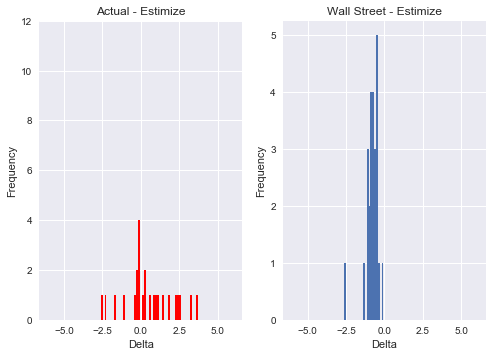

In [15]:
plt.subplot(121)
bins = np.linspace(-6, 6, 100)
plt.hist(df['eps_del_actual'], bins, color='red')
plt.title("Actual - Estimize")
plt.xlabel("Delta")
plt.ylabel("Frequency")
plt.ylim([0,12])

plt.subplot(122)
plt.hist(df['eps_del_Wall'], bins)
plt.title("Wall Street - Estimize")
plt.xlabel("Delta")
plt.ylabel("Frequency")
plt.show()

Looks like the eps delta between Actual Earnings and Estimize predictions is quite consistent in comparison to the delta between Wall Street predictions and Estimize predictions. 

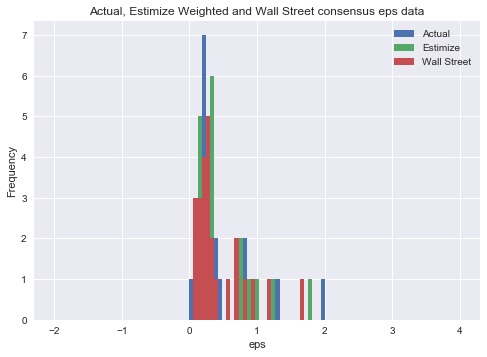

In [16]:
bins = np.linspace(-2, 4, 100)
plt.hist(df['actual.eps'], bins)
plt.hist(df['estimize.eps.weighted'], bins)
plt.hist(df['wallstreet.eps'], bins)
plt.title("Actual, Estimize Weighted and Wall Street consensus eps data")
plt.legend(["Actual", "Estimize", "Wall Street"]) 
plt.xlabel("eps")
plt.ylabel("Frequency")
plt.show()

# TO ADD SUBPLOT FOR REVENUE DATA!!!

#### Box plot

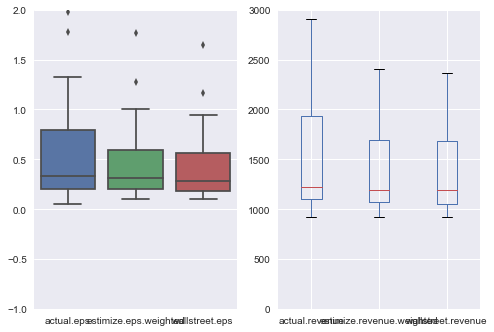

In [19]:
plt.subplot(121)
df_plot_eps = pd.concat([df['actual.eps'], df['estimize.eps.weighted'], df['wallstreet.eps']], axis=1)
sns.boxplot(df_plot_eps)
plt.ylim([-1,2])

plt.subplot(122)
df_plot_rev = pd.concat([df['actual.revenue'], df['estimize.revenue.weighted'], df['wallstreet.revenue']], axis=1)
df_plot_rev.boxplot()
plt.ylim([0,3000])
plt.show()

### Beeswarm plots

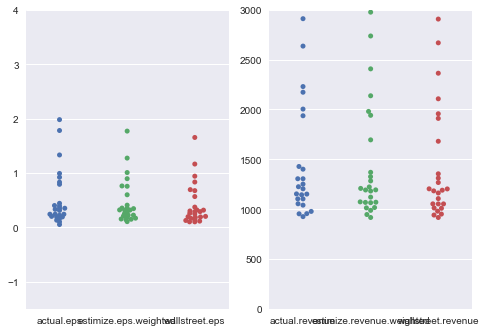

In [20]:
plt.subplot(121)
sns.swarmplot(data=df_plot_eps)
plt.ylim([-1.5,4])

plt.subplot(122)
sns.swarmplot(data=df_plot_rev)
plt.ylim([0,3000])
plt.show()

It seems that the actual eps has greater range than the Wall Street and Estimize preditions, whereas for the revenues, it is hard to tell. 

## Preparing data for Quantopian upload
#### From Quantopian website: 
"During the historical upload, Quantopian will translate the primary date column values into a historical timestamp by adding a historical lag (default: one day).

Trade Date Signals: If your date field represents the day you expect an algorithm to act on the signal, you should create a trade_date_minus_one column that can be used as the primary date column."

In [21]:
df_quanto = df[['date', 'ticker', 'DT', 'TM', 'eps_del_actual', 'eps_del_Wall', 'rev_del_actual', 'rev_del_Wall']]

In [22]:
df_quanto

,date,ticker,DT,TM,eps_del_actual,eps_del_Wall,rev_del_actual,rev_del_Wall
2386843,2012-02-15,NVDA,2012-02-15,16:00:00-05:00,-2.567411,-2.567411,-6.069800,-6.215564
2386847,2012-05-11,NVDA,2012-05-11,06:00:00-04:00,-0.132429,-0.132429,3.973896,-0.066416
2386868,2012-08-09,NVDA,2012-08-09,16:00:00-04:00,0.944222,-1.141346,1.972276,-0.302047
2386891,2012-11-08,NVDA,2012-11-08,16:00:00-05:00,2.336004,-0.516700,0.406735,-0.127068
2386908,2013-05-09,NVDA,2013-05-09,16:00:00-04:00,-0.208543,-0.932355,0.737999,-0.450886
2386918,2013-08-08,NVDA,2013-08-08,16:00:00-04:00,0.291401,-0.974956,-0.961443,-0.730280
2386923,2013-11-07,NVDA,2013-11-07,16:00:00-05:00,-1.045744,-1.045744,-0.733069,-0.829983
2386971,2014-02-12,NVDA,2014-02-12,16:00:00-05:00,1.125188,-0.823361,1.713927,-0.483671
2387056,2014-05-08,NVDA,2014-05-08,16:00:00-04:00,1.869744,-0.570462,1.165489,-0.596163
2387146,2014-08-07,NVDA,2014-08-07,16:00:00-04:00,-0.084829,-0.907765,-0.951427,-0.799289


In [23]:
# rename columns so that Quantopian can understand:
df_quanto.columns = ['asof_date', 'symbol', 'DT', 'TM', 'actual_del_eps', 'wal_del_eps', 'rev_del_actual', 'wal_del_rev']
df_quanto.reset_index()

,index,asof_date,symbol,DT,TM,actual_del_eps,wal_del_eps,rev_del_actual,wal_del_rev
0,2386843,2012-02-15,NVDA,2012-02-15,16:00:00-05:00,-2.567411,-2.567411,-6.069800,-6.215564
1,2386847,2012-05-11,NVDA,2012-05-11,06:00:00-04:00,-0.132429,-0.132429,3.973896,-0.066416
2,2386868,2012-08-09,NVDA,2012-08-09,16:00:00-04:00,0.944222,-1.141346,1.972276,-0.302047
3,2386891,2012-11-08,NVDA,2012-11-08,16:00:00-05:00,2.336004,-0.516700,0.406735,-0.127068
4,2386908,2013-05-09,NVDA,2013-05-09,16:00:00-04:00,-0.208543,-0.932355,0.737999,-0.450886
5,2386918,2013-08-08,NVDA,2013-08-08,16:00:00-04:00,0.291401,-0.974956,-0.961443,-0.730280
6,2386923,2013-11-07,NVDA,2013-11-07,16:00:00-05:00,-1.045744,-1.045744,-0.733069,-0.829983
7,2386971,2014-02-12,NVDA,2014-02-12,16:00:00-05:00,1.125188,-0.823361,1.713927,-0.483671
8,2387056,2014-05-08,NVDA,2014-05-08,16:00:00-04:00,1.869744,-0.570462,1.165489,-0.596163
9,2387146,2014-08-07,NVDA,2014-08-07,16:00:00-04:00,-0.084829,-0.907765,-0.951427,-0.799289


In [24]:
# write out the dataframe as .csv file:
df_quanto.to_csv('NVDA.csv', index = False)

In [25]:
check = pd.read_csv('NVDA.csv')

In [25]:
check.loc[check['asof_date'] == '2017-04-27']

,asof_date,symbol,DT,TM,actual_del_eps,wal_del_eps,rev_del_actual,wal_del_rev
22,2017-04-27,AMZN,2017-04-27,16:00:00-04:00,0.941702,-0.246771,0.363861,-0.246342


In [26]:
check.tail()

,asof_date,symbol,DT,TM,actual_del_eps,wal_del_eps,rev_del_actual,wal_del_rev
20,2017-05-09,NVDA,2017-05-09,16:00:00-04:00,0.257969,-0.576457,-0.038322,-0.264630
21,2017-08-10,NVDA,2017-08-10,16:00:00-04:00,1.487423,-0.630680,2.752711,-0.257181
22,2017-11-09,NVDA,2017-11-09,16:00:00-05:00,2.576537,-0.530945,1.643196,-0.313983
23,2018-02-08,NVDA,2018-02-08,16:00:00-05:00,2.466891,-0.531327,0.834978,-0.331282
24,2018-05-10,NVDA,2018-05-10,16:00:00-04:00,0.593647,-0.329779,0.825608,-0.248572
